<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite-Difference Method - High-Order Taylor Operators</div>
        </div>
    </div>
</div>

# High-Order Taylor Operators

This exercise covers the following aspects

* Learn how to define high-order central finite-difference operators
* Investigate the behaviour of the operators with increasing length

#### Basic Equations

The Taylor expansion of $f\left(x+\mathrm{d}x\right)$ around $x$ is defined as 

$$
f\left(x+\mathrm{d}x\right)=
\sum\limits_{n=0}^{\infty}
\dfrac{f^{\left(n\right)}\left(x\right)}{n!}
{\left(\mathrm{d}x\right)}^{n}  
$$

Finite-difference operators can be calculated by seeking weights (here: $a$, $b$, $c$) with which function values have to be multiplied to obtain an interpolation or a derivative. Example:

$$
\begin{align}
af\left(x+\mathrm{d}x\right) &=
a\left[
f\left(x\right)+
f^{\prime}\left(x\right)\mathrm{d}x+
\dfrac{1}{2!}f^{\prime\prime}\left(x\right){\left(\mathrm{d}x\right)}^{2}+\dotsc\right] \\
bf\left(x\right) &=
b\left[f\left(x\right)\right] \\
cf\left(x-\mathrm{d}x\right) &=
c\left[f\left(x\right)-f^{\prime}\left(x\right)\mathrm{d}x+
\frac{1}{2!}f^{\prime\prime}\left(x\right){\left(\mathrm{d}x\right)}^{2}-\dotsc\right]
\end{align}
$$

This can  be expressed in matrix form by comparing coefficients, here seeking a 2nd derivative

$$
\begin{align}
a+b+c & =0 \\
a-c &=0 \\
a+c & = \dfrac{2!}{\mathrm{d}x^{2}}
\end{align}
$$

which leads to 

$$
\begin{pmatrix}
  1 & 1 & 1 \\
  1 & 0 & -1 \\
  1 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
 a\\
 b \\
 c
\end{pmatrix}=
\begin{pmatrix}
 0 \\
 0 \\
\dfrac{2!}{{\left(\mathrm{d}x\right)}^2}
\end{pmatrix}
$$

and using matrix inversion we obtain 

$$
\begin{pmatrix}
a \\
b\\
c
\end{pmatrix}=
\begin{pmatrix}
\dfrac{1}{2{\left(\mathrm{d}x\right)}^2} \\
-\dfrac{2}{2{\left(\mathrm{d}x\right)}^2} \\
\dfrac{1}{2{\left(\mathrm{d}x\right)}^2}
\end{pmatrix}
$$

This is the the well known 3-point operator for the 2nd derivative. This can easily be generalized to higher point operators and higher order derivatives. Below you will find a routine that initializes the system matrix and solves for the Taylor operator. 

#### Calculating the Taylor operator

The subroutine `central_difference_coefficients()` initializes the system matrix and solves for the difference weights assuming $\mathrm{d}x=1$. It calculates the centered differences using an arbitrary number of coefficients, also for higher derivatives. The weights are defined at $x\pm i\mathrm{d}x$ and $i=0,..,(\text{nop}-1)/2$, where $\text{nop}$ is the length of the operator. Careful! Because it is centered $nop$ has to be an odd number (3,5,...)!

It returns a central finite difference stencil (a vector of length $\text{nop}$)  for the `n`th derivative.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

In [2]:
# Define function to calculate Taylor operators


def central_difference_coefficients(nop, n):
    """
    Calculate the central finite difference stencil for an arbitrary number
    of points and an arbitrary order derivative.

    :param nop: The number of points for the stencil. Must be
        an odd number.
    :param n: The derivative order. Must be a positive number.
    """
    m = np.zeros((nop, nop))
    for i in range(nop):
        for j in range(nop):
            dx = j - nop // 2
            m[i, j] = dx**i

    s = np.zeros(nop)
    s[n] = factorial(n)

    # The following statement return oper = inv(m) s
    oper = np.linalg.solve(m, s)
    # Calculate operator
    return oper

#### Plot Taylor operators

Investigate graphically the Taylor operators. Increase $nop$ for the first $n=1$ or higher order derivatives. Discuss the results and try to understand the interpolation operator (derivative order $n=0$).

In [3]:
# Calculate and plot Taylor operator


# Give length of operator (odd)
nop = 25
# Give order of derivative (0 - interpolation, 1 - first derivative, 2 - second derivative)
n = 1

# Get operator from routine 'central_difference_coefficients'
oper = central_difference_coefficients(nop, n)

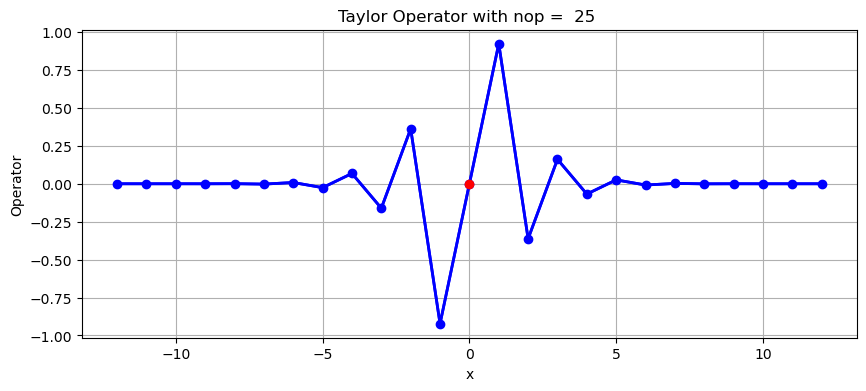

In [4]:
# Plot operator
x = np.linspace(-(nop - 1) / 2, (nop - 1) / 2, nop)

# Simple plot with operator
plt.figure(figsize=(10, 4))
plt.plot(x, oper, lw=2, color="blue")
plt.plot(x, oper, lw=2, marker="o", color="blue")
plt.plot(0, 0, lw=2, marker="o", color="red")
# plt.plot (x, nder5-ader, label="Difference", lw=2, ls=":")
plt.title("Taylor Operator with nop =  %i " % nop)
plt.xlabel("x")
plt.ylabel("Operator")
plt.grid()

## Conclusions
* The Taylor operator weights decrease rapidly with distance from the central point
* In practice often 4th order operators are used to calculate space derivatives